<a href="https://colab.research.google.com/github/kmahatma/ssmi-patternrecognition/blob/main/w06_03_tanpa_skema_bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# 1. Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)

In [4]:
# 2. Load Dataset
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

# 3. Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=1
)


In [7]:
# 4. Create Pipeline (StandardScaler + LogisticRegression)
pipe = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=1, max_iter=1000)
)

# 5. Train Model
pipe.fit(X_train, y_train)

# 6. Evaluate Model
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)
print(f"Training Accuracy: {train_score:.3f}")
print(f"Test Accuracy    : {test_score:.3f}")

# 7. Predictions
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]



Training Accuracy: 0.991
Test Accuracy    : 0.965


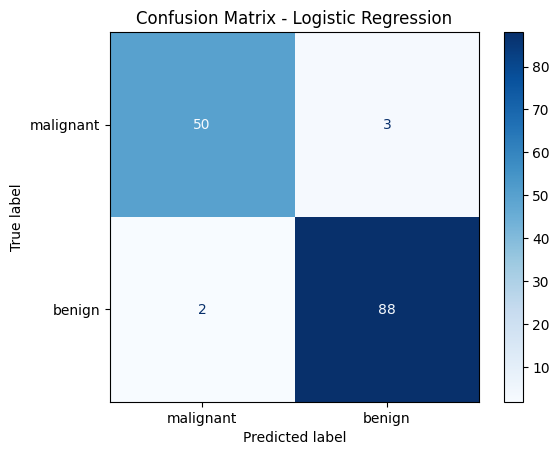

In [8]:
# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=bc.target_names).plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

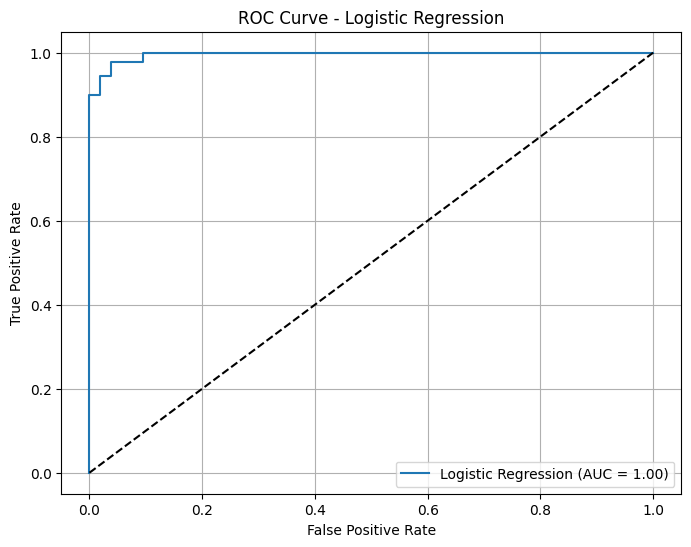

In [9]:
# 10. ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()